<h3>Ejemplo de una Regresión Lineal Simple.</h3>

En este ejercicio vamos a observar como funciona una regresión lineal simple con funciones implementadas manualmente

El objetivo de la regresión lineal es minimizar la función de costo:

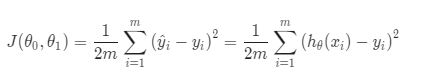


donde:
* "m": numero de ejemplos
* "y" es el ground truth, el valor real.
* h (denominada hipótesis) es la predicción, la cual esta definida por el siguiente modelo lineal:

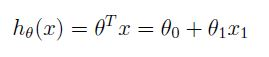

Los parámetros del modelo son los valores Theta0 y Theta1, estos son
los valores que se ajustarán para minimizar la función de costo.
Una forma de hacer esto es utilizando el algoritmo de descenso de gradiente por lotes. 
En el descenso de gradiente por lotes, cada iteración realiza la actualización de los valores de los parámetros Theta(j). Existen otros algoritmos del descenso del gradiente como el Stochastic Gradient Descent (actualiza los valores por cada ejemplo) y el Mini Batch Gradient Descent (actualiza cada n ejemplos). Existen otros algoritmos de optimización como RMS Prop, Momentum, Adam, AdaGrad utilizados ampliamente en Redes Neuronales.

Fórmula del Gradiente Descendente:

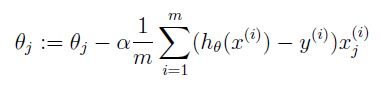

Con cada paso del descenso del gradiente, sus parámetros Theta(j) se acercan a los valores óptimos que lograrán la menor función de costo.

Relación de la función de costo con el gradiente descedente:


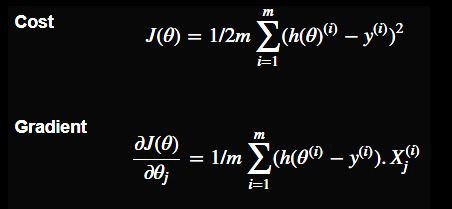

El Gradiente Descendente es la Derivada parcial de la función de costos.
"Una derivada parcial de una función de diversas variables, es la derivada respecto a cada una de esas variables manteniendo las otras como constantes".

Vamos a ver un ejercicio donde se desea calcular los parametros Theta(j) usando el Gradiente Descendente

implementaremos la regresión lineal con una variable para predecir las ganancias de un camión de alimentos. Supongamos que tu eres el director ejecutivo de una franquicia de restaurantes y están considerando diferentes ciudades para abrir un nuevo restaurante. La cadena ya tiene camiones en varias ciudades y tienes datos para poblaciones (variable independiente - predictora - X) y ganancias (variable dependiente Y).

In [260]:
### Importemos las librerias necesarias
import numpy as np
import pandas as pd

In [261]:
### Carguemos los datos de poblaciones
dataframeX = pd.read_csv("DataSetX.csv",index_col=False)


In [262]:
### Dimensiones
dataframeX.shape

(97, 1)

In [263]:
## Datos iniciales
dataframeX.head()

poblacion
0     6.1101
1     5.5277
2     8.5186
3     7.0032
4     5.8598

In [264]:
### DAtos finales
dataframeX.tail()

poblacion
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369

In [265]:
### Cargar dataframeY
dataframeY = pd.read_csv("DatasetY.csv", index_col=False)

In [266]:
### Shape
dataframeY.shape

(97, 1)

In [267]:
### Primeros datos
dataframeY.head

<bound method NDFrame.head of     ganancias
0    17.59200
1     9.13020
2    13.66200
3    11.85400
4     6.82330
..        ...
92    7.20290
93    1.98690
94    0.14454
95    9.05510
96    0.61705

[97 rows x 1 columns]>

In [268]:
### Descripcion del DataFrame
dataframeY.describe

<bound method NDFrame.describe of     ganancias
0    17.59200
1     9.13020
2    13.66200
3    11.85400
4     6.82330
..        ...
92    7.20290
93    1.98690
94    0.14454
95    9.05510
96    0.61705

[97 rows x 1 columns]>

In [269]:
#3# paquete para hacer un diagrama de regresion
import seaborn as sns

In [270]:
DataFrameXY = pd.concat([dataframeX,dataframeY], axis=1)

In [271]:
    DataFrameXY.head()

poblacion  ganancias
0     6.1101    17.5920
1     5.5277     9.1302
2     8.5186    13.6620
3     7.0032    11.8540
4     5.8598     6.8233

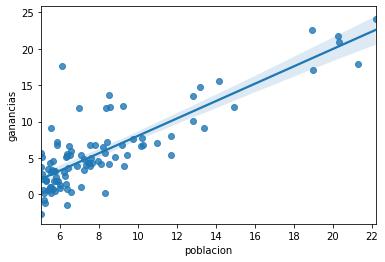

In [ ]:
### Plot de REgresion
sns.regplot(x="poblacion", y="ganancias", data=DataFrameXY)

In [272]:
### Numero de ejemplos
m = len(DataFrameXY)
print(m)

97


In [273]:
### Inicializacion del vector de parametros theta con zeros
thetaNDArray = np.zeros((2,1), dtype=int)

In [274]:
### Copiar dataframe
dataframeXCompletado = dataframeX

In [275]:
#### Instruccion adicionada
dataframeXCompletado["Intercepto"] = 1

In [276]:
dataframeXCompletado

poblacion  Intercepto
0      6.1101           1
1      5.5277           1
2      8.5186           1
3      7.0032           1
4      5.8598           1
..        ...         ...
92     5.8707           1
93     5.3054           1
94     8.2934           1
95    13.3940           1
96     5.4369           1

[97 rows x 2 columns]

In [277]:
### invertir el orden
dataframeXCompletadoOrdenado = dataframeXCompletado[["Intercepto","poblacion"]]

In [278]:
dataframeXCompletadoOrdenado

Intercepto  poblacion
0            1     6.1101
1            1     5.5277
2            1     8.5186
3            1     7.0032
4            1     5.8598
..         ...        ...
92           1     5.8707
93           1     5.3054
94           1     8.2934
95           1    13.3940
96           1     5.4369

[97 rows x 2 columns]

In [279]:
### Funcion de costo implementada con base en definicion de ejemplo de Octave
def CostFunctionJ (dataframeXCompletadoOrdenado, dataframeY, theta):
  ### Calcula la funcion de costo para a regresion lineal
  ###  Variable de retorno 
  J = 0
  ### number of traning examples
  m = len(dataframeX) 

  ### print(dataframeXCompletadoOrdenado.shape)
  ### print(dataframeY.shape)
  ### print(theta.shape)
  ### predictions = dataframeXCompletadoOrdenado * theta
  ### print("shape de dataframeXCompletadoOrdenado: " + str(dataframeXCompletadoOrdenado.shape))
  ### print("shape de theta: " + str(theta.shape))

  ### Calculo de la prediccion
  predictions = np.dot(dataframeXCompletadoOrdenado, theta)
  predictionsMenosY = (predictions - dataframeY)
  ### Cuadrado de los errores
  sqrErrors   = predictionsMenosY ** 2
  ### Calculo de la funcion de costos.
  J = 1/(2*m) * np.sum(sqrErrors)
  return J

In [280]:
### Verificando funcion de costos originalmente creada a mano
print("Valor de la funcion de costos con thetaParams = [0,0] - Error en")
CostJ = CostFunctionJ(dataframeXCompletadoOrdenado, dataframeY, thetaNDArray)
print(CostJ)

Valor de la funcion de costos con thetaParams = [0,0] - Error en
ganancias    32.072734
dtype: float64


In [281]:
thetaNDArray[0]=-1

In [282]:
thetaNDArray[1]=2


In [283]:
 thetaNDArray

array([[-1],
       [ 2]])

In [284]:
#### Probando la funcion de costos original con valores de parametros thetaNDArray = [-1,2] 
#### deberia dar 54.24
J = CostFunctionJ(dataframeXCompletadoOrdenado, dataframeY, thetaNDArray)

In [285]:
### Verificando funcion de costos originalmente creada a mano
print("Valor de la funcion de costos con thetaParams = [-1,2] - Error en")
CostJ = CostFunctionJ(dataframeXCompletadoOrdenado, dataframeY, thetaNDArray)
print(CostJ)

Valor de la funcion de costos con thetaParams = [-1,2] - Error en
ganancias    54.242455
dtype: float64


In [286]:
### Invocacion del Gradiente Descendente usando Iteraciones y learning rate alpha

In [287]:
### Iteraciones del articulo 1500
iterations = 1500
#### Iteraciones para debug
#### iterations = 5
alpha = 0.01

In [288]:
### Comprobando shape de X
dataframeXCompletadoOrdenado.shape

(97, 2)

In [289]:
### Comprobando shape de y
dataframeY.shape

(97, 1)

In [290]:
### Comporobando valor de alpha - learning rate
print(alpha)

0.01


In [291]:
### Comprobar valor del numero de iteraciones
print(iterations)

1500


In [292]:
### Inicializacion del vector de parametros theta con zeros
thetaNDArray = np.zeros((2,1), dtype=int)

In [294]:
### Gradiente Descendente Python elaborado a mano
def gradientDescent(dataframeXCompletadoOrdenado, dataframeY, theta, alpha, num_iters):
  ### Ejecuta el gradiente descendente para aprencolumn1
  m = len(dataframeY)
  for iter in range(num_iters):
    ### Ejecuta un paso simple sobre el vector de parametros Theta
    ### En modo debug puede ser util imprimir la funcion de costo y el gradiente
    ### h son las predicciones
    h = np.dot(dataframeXCompletadoOrdenado, theta)
    ### Actualizacion del vector de parametros
    theta = theta - (1/m)*alpha*(dataframeXCompletadoOrdenado.T.dot((h-dataframeY)))
    print(iter)
  return theta

In [295]:
#### Verificando invocacion a gradientDescent
parametrosGradiente = gradientDescent(dataframeXCompletadoOrdenado, dataframeY, thetaNDArray, alpha, iterations)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [296]:
### Chequeo de los parametros del gradiente
print(parametrosGradiente)

            ganancias
Intercepto  -3.630291
poblacion    1.166362


In [297]:
#### Calcular las ganancias para una poblacion de 35.000 habitantes
np.dot([1,3.5],parametrosGradiente)*10000

array([4519.7678677])

In [298]:
#### Calcular las ganancias para una poblacion de 70.000 habitantes
np.dot([1,7.0],parametrosGradiente)*10000

array([45342.45012945])

Fuentes de informacion:
* https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
* www.coursera.com - Curso Machine Learning - Andrew Ng - Semana 2
LinearRegression.pdf

